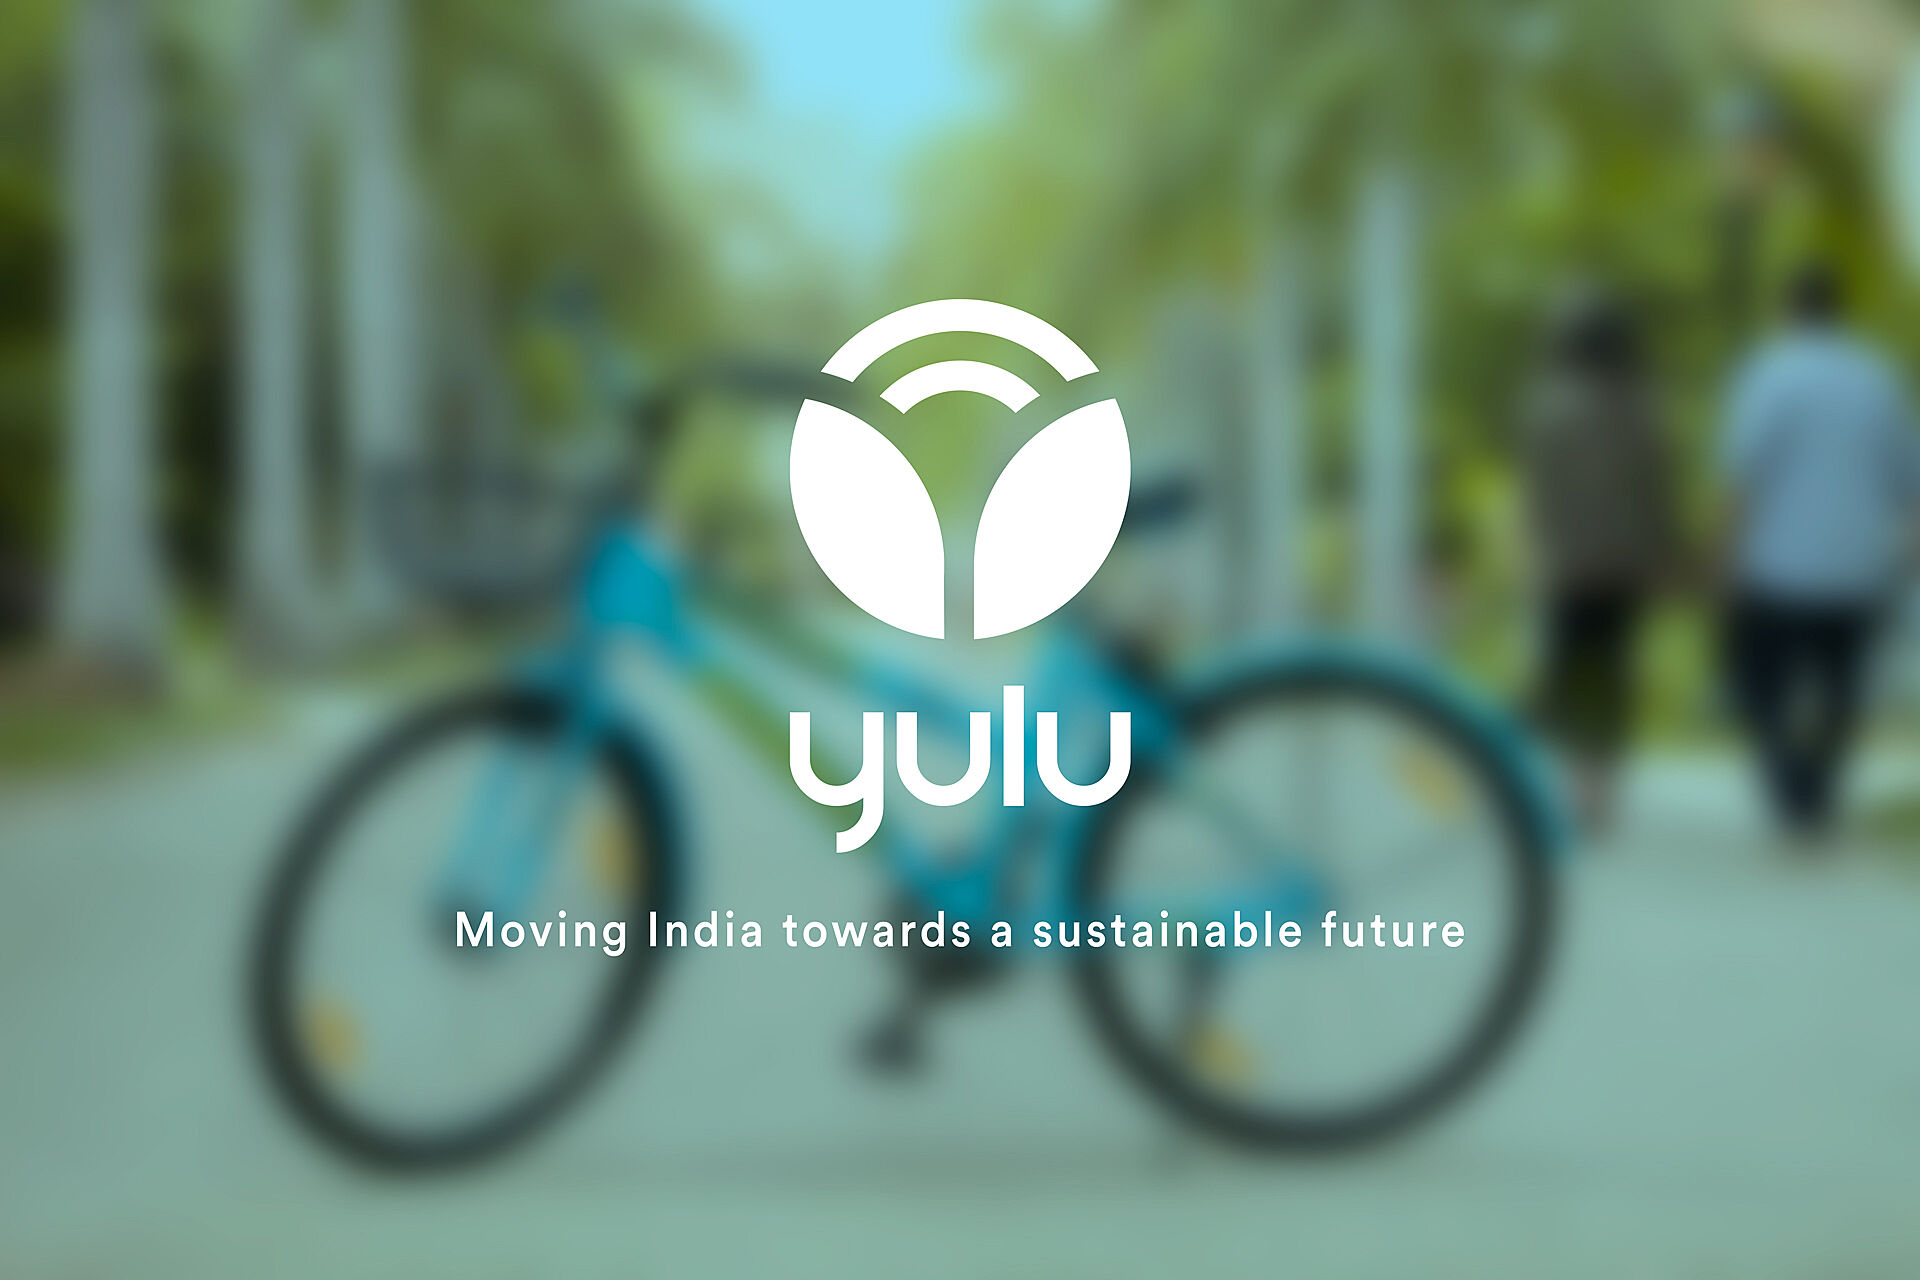

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Basis Data Analysis

In [ ]:
df = pd.read_csv("bike_sharing.txt")

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df["datetime"].min() , df["datetime"].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [ ]:
df["datetime"].max() - df["datetime"].min()

Timedelta('718 days 23:00:00')

In [ ]:
718-456 #we have 262 days of data missing from 2011-01-01 to 2012-12-19

262

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


data is distributed in terms of per hour

In [ ]:
for i in df.columns:
    print(f"{i} : {df[i].nunique()}")

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [ ]:
col = ["season" , "holiday" , "workingday" , "weather"]

for i in col:
  print(f"{i} : {df[i].value_counts()}")

season : season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
holiday : holiday
0    10575
1      311
Name: count, dtype: int64
workingday : workingday
1    7412
0    3474
Name: count, dtype: int64
weather : weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


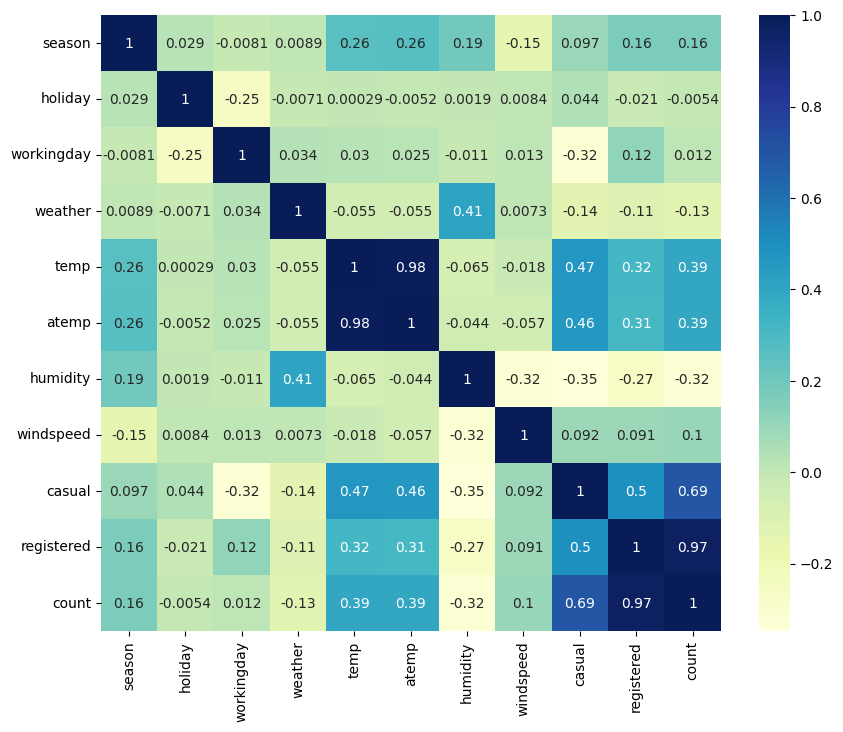

In [ ]:
df_copy = df.copy()

df_copy.drop(["datetime"] , axis = 1 , inplace = True)

plt.figure(figsize = (10,8))
sns.heatmap(df_copy.corr() , cmap="YlGnBu" , annot=True)
plt.show()


Insights:-




*  There is a very high positive correlation between temp and atemp (0.98). This is expected since atemp (feels-like temperature) is derived from the actual temperature (temp).

*   Casual and registered users are moderately positively correlated (0.5). This suggests that factors driving casual bike rentals might also influence registered users but to a lesser extent.

*   Count is strongly correlated with registered users (0.97) and moderately with casual users (0.69). This indicates that registered users contribute more significantly to the total count of bike rentals.

*   The weather variable shows a negative correlation with count (-0.13) and registered users (-0.11), indicating that bad weather reduces bike rentals, particularly for registered users.

*   The workingday variable has a slightly negative correlation with casual users (-0.32) and a very weak positive correlation with registered users (0.12). This suggests that on working days, casual rentals decrease, while registered rentals show a slight increase.

Recommendations:

*   Since bike rentals drop in poor weather conditions, consider offering discounts or promotions during these times to encourage more usage.

*   Given the strong correlation between registered users and the total count, focus marketing efforts on converting casual users into registered users, as they significantly contribute to overall rentals.

*   Given the positive correlation between season and temperature, anticipate higher demand during warmer seasons and adjust bike availability accordingly. Conversely, reduce the fleet size during colder seasons to cut down on maintenance and operational costs.

*   Casual users are less likely to rent on working days. Therefore, consider offering special promotions or events on weekends to attract more casual riders.

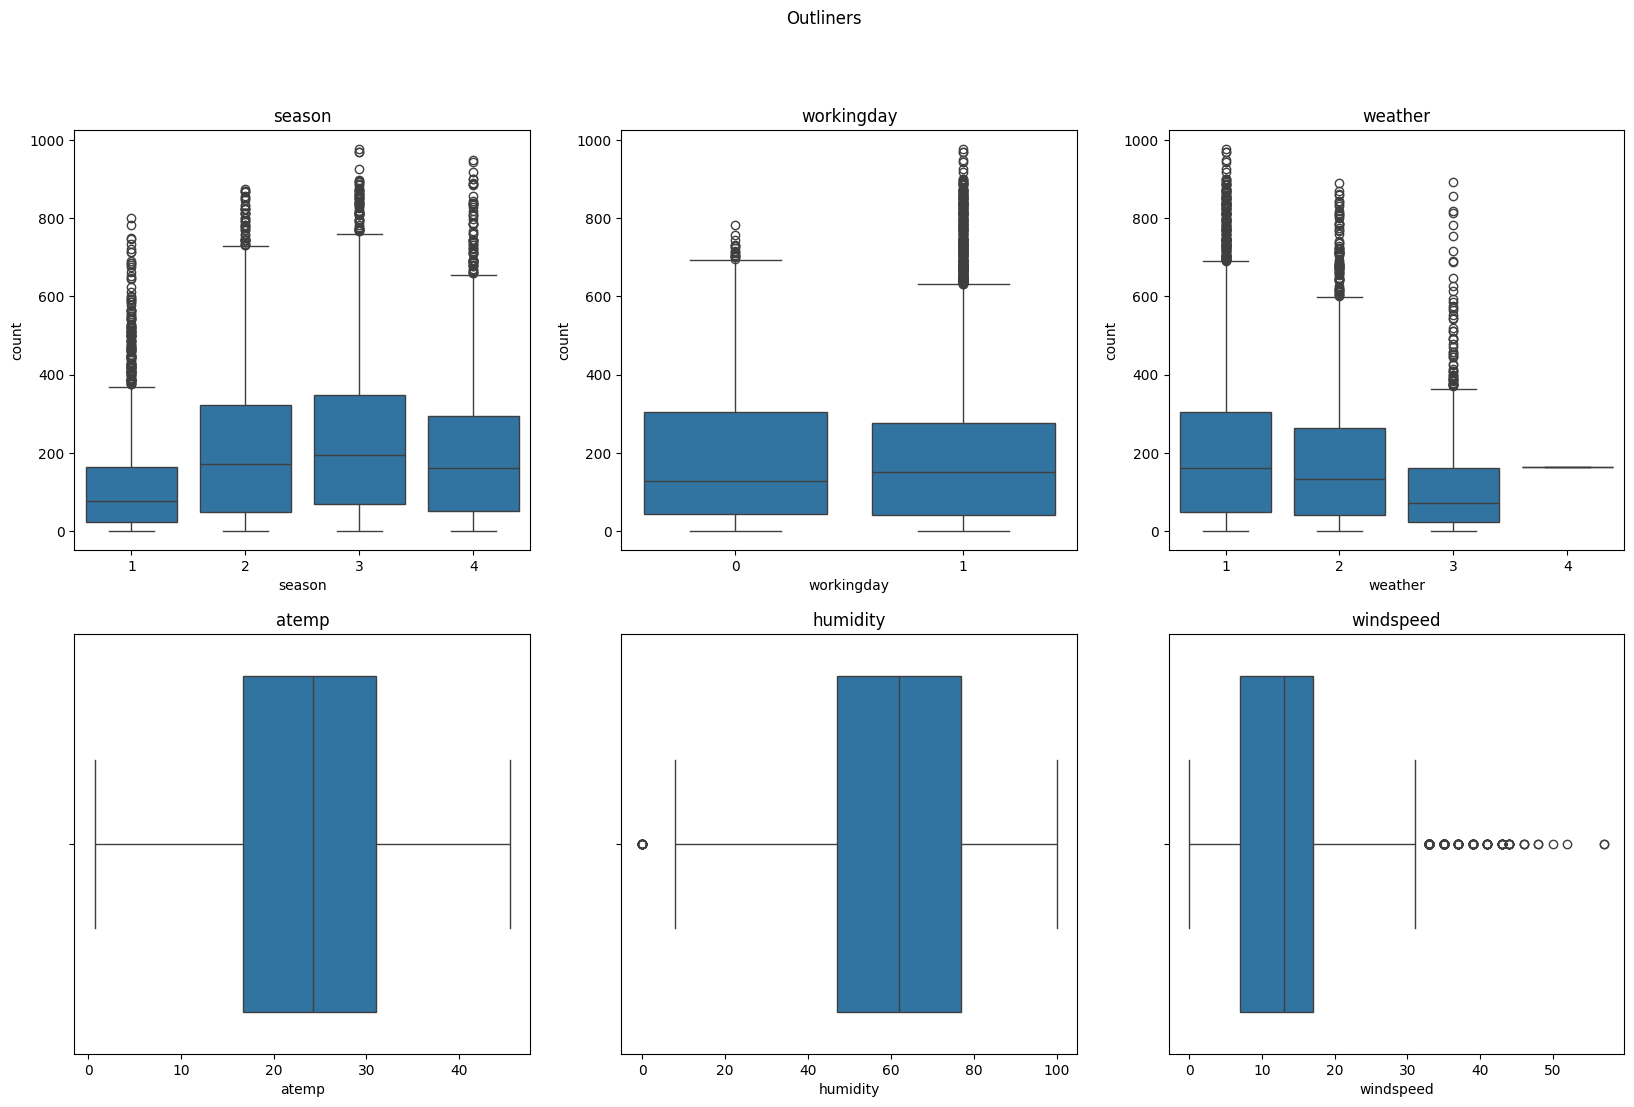

In [ ]:
col = ["season" , "workingday" , "weather"]


c = 1
plt.figure(figsize = (20,12)).suptitle("Outliners")
for i in col:
  plt.subplot(2,3,c)
  plt.title(i)
  sns.boxplot(data = df , x = i , y = "count")
  c+=1

col = ["atemp" , "humidity" , "windspeed"]
c = 4
for i in col:
  plt.subplot(2,3,c)
  plt.title(i)
  sns.boxplot(data = df , x = i)
  c+=1


Insights :-

*   The count of bike rides varies significantly across seasons. The highest number of rides occurs in fall (season 3), followed closely by summer (season 2). Spring (season 1) shows the lowest ridership.

*   The number of bike rides decreases significantly in harsher weather conditions (e.g., light snow, heavy rain, snow + fog). The highest ridership occurs on clear or slightly cloudy days (weather condition 1).

*   There isn't a significant difference in the number of rides between working days and non-working days, although working days show a slightly higher median count.


*   The optimal conditions for booking a ride are when the temperature is between 20 to 30 degrees Celsius, humidity levels are between 45% and 75%, and wind speeds range from 8 to 18 km/h

Recommendations:

*   Since bike ridership peaks in fall and summer, consider launching promotional campaigns, discounts, or memberships during these seasons to capitalize on the higher demand.

*   Introduce incentives or discounts in spring to boost ridership during this season, which shows the lowest usage.

*   Consider implementing lower rates during poor weather conditions (e.g., light snow, heavy rain) to encourage ridership even when the weather is less favorable. Yulu can also provide raincoats for users to keep riding cycle as an option in bad weather condition also.

*   Since ridership is stable across working days, establish partnerships with companies to promote bike-sharing as a commuting option


*   Develop an in-app notification system that alerts users when the weather is optimal for riding, based on these parameters. This could increase user engagement and ridership.

*   Adjust the availability of bikes and staff during optimal conditions to meet the expected increase in demand, ensuring a better experience for users.

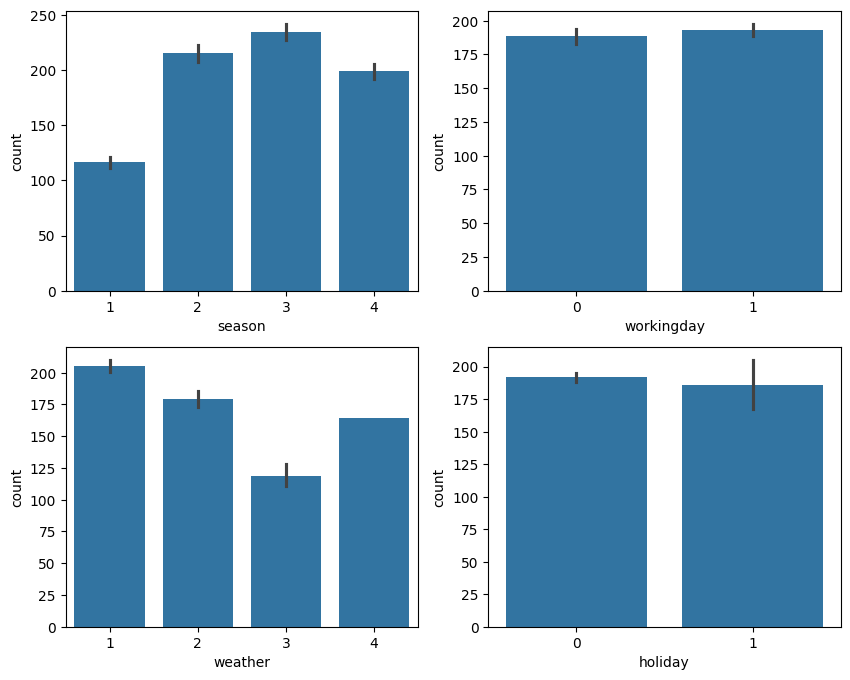

In [ ]:
barcol = ["season" , "workingday" , "weather", "holiday"]

c = 1
plt.figure(figsize = (10,8))
for i in barcol:
  plt.subplot(2,2,c)
  sns.barplot(data =df , x = i , y = "count")
  c += 1

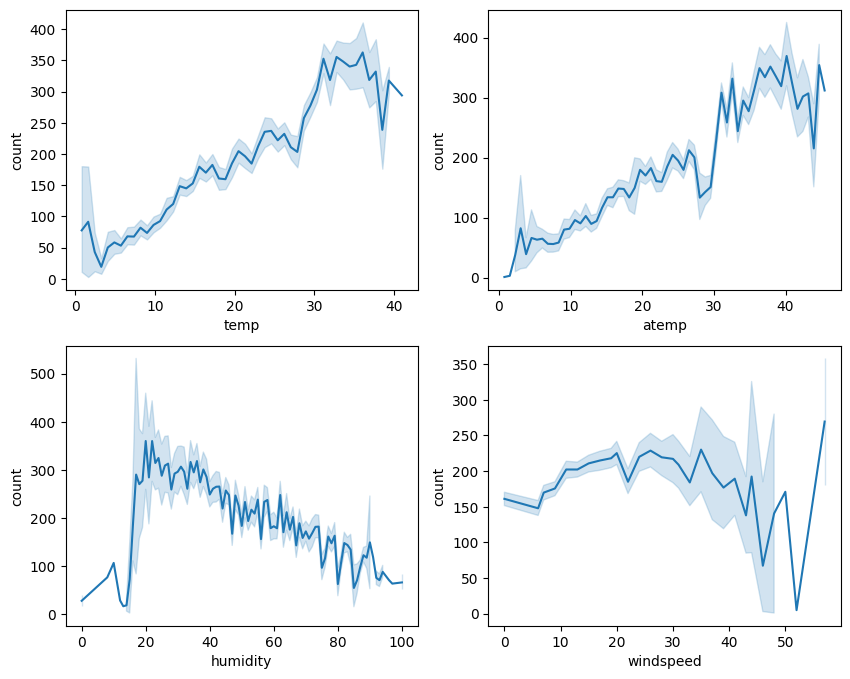

In [ ]:
linecol = ["temp" , "atemp" , "humidity", "windspeed"]

c = 1
plt.figure(figsize = (10,8))
for i in linecol:
  plt.subplot(2,2,c)
  sns.lineplot(data =df , x = i , y = "count")
  c += 1

Insights:-

*   As the temperature increases, there is a noticeable rise in the number of people opting for Yulu cycles, indicating a positive correlation between temperature and cycle usage.

*   There is a clear negative correlation between humidity and cycle usage, with a steady decline in ridership as humidity levels increase.
  
*   Cycling activity remains relatively stable when wind speeds are between 20 KMPH and 30 KMPH, but beyond this range, there is a significant drop and increased fluctuations in ridership.  

Recommendations:-

*   Consider offering temperature-based incentives, such as discounts or rewards, on hotter days when ridership tends to be higher. This could further boost usage during peak temperatures

*   Since ridership decreases significantly at higher wind speeds, consider providing users with wind speed alerts and safety tips through the app.


Hypothesis Testing

> Working Day has effect on number of electric cycles rented


In [ ]:
working = df[df["workingday"] == 1]["count"]
non_working = df[df["workingday"] == 0]["count"]

'''
Null Hypothesis ---> Working days and Non-Working days does not impact electric cycles rented
Alternate Hypothsis ---> Working days and Non-Working days impact electric cycles rented
'''

#Since population mean and std. deviation is unknown, we will use T-Test for testing the hypothesis.

#It is two tailed test.

#since it is a bussiness model, let us consider confidence interval to be 90%


from scipy.stats import ttest_ind

t_stat , pval = ttest_ind(working , non_working , alternative = "two-sided")

print(f"P-Value : {pval}")

aplha = 0.1

if pval < aplha:
  print("Reject Null Hypothesis : Working days and Non-Working days impact electric cycles rented")
else:
  print("Accept Null Hypothesis : Working days and Non-Working days does not impact electric cycles rented")

P-Value : 0.22644804226361348
Accept Null Hypothesis : Working days and Non-Working days does not impact electric cycles rented


Our hypothesis testing indicates that there is no significant difference in the number of electric cycles rented on working days compared to non-working days.

Recommendations:




*   Since working days and non-working days show no significant difference in usage, consider implementing a flexible pricing strategy that doesn’t rely on the day of the week but rather on other factors such as time of day, weather, or special events.



> No. of cycles rented similar or different in different seasons



In [ ]:
df["season"].unique()

array([1, 2, 3, 4])

In [ ]:
season1 = df[df["season"] == 1]["count"]
season2 = df[df["season"] == 2]["count"]
season3 = df[df["season"] == 3]["count"]
season4 = df[df["season"] == 4]["count"]

#Null Hypothesis ---> No. of cycles rented does not deppend on seasons (m1 = m2 = m3 =m4)
#Alternate Hypothesis ---> No. of cycles rented depend on seasons


# We will use one-way ANOVA to test our hypotesis.



In [ ]:
# Before using Anova , let us check the variance is simailar or not using levence test.

from scipy.stats import levene

'''
Ho --> Variance is similar
Ha --> Variance is not similar
'''

len_stats , pval = levene(season1 , season2 , season3 , season4)

if pval < 0.05:
  print("Reject Null Hypothesis : Variance is not similar")
else:
  print("Accept Null Hypothesis : Variance is similar")

Reject Null Hypothesis : Variance is not similar


In [ ]:
from scipy.stats import shapiro

'''
Ho --> Data is normally distributed
Ha --> Data is not normally distributed
'''

shapiro(season1)

ShapiroResult(statistic=0.8087378401253588, pvalue=8.749584618867662e-49)

In [ ]:
#both our condtion for testing of ANOVA has failed but still, let us continue with test to see any kind of relation

from scipy.stats import f_oneway

f_stat , pval = f_oneway(season1 , season2 , season3 , season4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : No. of cycles rented depend on seasons")
else:
  print("Accept Null Hypothesis : No. of cycles rented does not deppend on seasons")

p_value : 6.164843386499654e-149
Reject Null Hypothesis : No. of cycles rented depend on seasons




Since, our sample does not satisfy levene and shapiro test, let us now use **Kruskal Wallis Test**

In [ ]:
from scipy.stats import kruskal

kruskal_stat , pval = kruskal(season1 , season2 , season3 , season4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : No. of cycles rented depend on seasons")
else:
  print("Accept Null Hypothesis : No. of cycles rented does not deppend on seasons")

p_value : 2.479008372608633e-151
Reject Null Hypothesis : No. of cycles rented depend on seasons


Through hypothesis testing, it was determined that the number of cycles rented is significantly influenced by the season.

Recommendations:

*   Develope target market stratergies for each season.

*   Yulu can give some discounts in off-season like in spring season, to encorage ridership troughout the year.

*   Adjust the number of available cycles and maintenance resources according to the season.











> No. of cycles rented similar or different in different weather




In [ ]:
df["weather"].unique()

array([1, 2, 3, 4])

In [ ]:
weather1 = df[df["weather"] == 1]["count"]
weather2 = df[df["weather"] == 2]["count"]
weather3 = df[df["weather"] == 3]["count"]
weather4 = df[df["weather"] == 4]["count"]

#Null Hypothesis ---> No. of cycles rented does not depend on weather. (m1 = m2 = m3 = m4)
#Alternate Hypothesis ---> No. of cycles rented depend on weather


# we will use one-way anova to test our hypotesis.

In [ ]:
# Before using Anova , let us check the variance is simailar or not using levence test.

from scipy.stats import levene

'''
Ho --> Variance is similar
Ha --> Variance is not similar
'''

len_stats , pval = levene(weather1 , weather2 , weather3 , weather4)

print(pval)

if pval < 0.05:
  print("Reject Null Hypothesis : Variance is not similar")
else:
  print("Accept Null Hypothesis : Variance is similar")

3.504937946833238e-35
Reject Null Hypothesis : Variance is not similar


In [ ]:
from scipy.stats import shapiro

'''
Ho --> Data is normally distributed
Ha --> Data is not normally distributed
'''

shapiro(weather1)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8909259459740138, pvalue=1.5964921477006555e-57)

In [ ]:
#both our condtion for testing of ANOVA has failed but still, let us continue with test to see any kind of relation

f_stats , pval = f_oneway(weather1 , weather2 , weather3 , weather4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : No. of cycles rented depend on weather")
else:
  print("Accept Null Hypothesis : No. of cycles rented does not depend on weather")

p_value : 5.482069475935669e-42
Reject Null Hypothesis : No. of cycles rented depend on weather


Since, our sample does not satisfy levene and shapiro test, let us now use **Kruskal Wallis Test**

In [ ]:
from scipy.stats import kruskal

kruskal_stat , pval = kruskal(weather1 , weather2 , weather3 , weather4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : No. of cycles rented depend on weather")
else:
  print("Accept Null Hypothesis : No. of cycles rented does not depend on weather")

p_value : 3.501611300708679e-44
Reject Null Hypothesis : No. of cycles rented depend on weather


From our hypothesis testing, we determined that the number of cycles rented is significantly influenced by weather conditions."

Recommendations:

*   Implement dynamic pricing based on weather conditions. For instance, offering discounts on days with less favorable weather (e.g., rain)

*   Use the app to provide real-time weather updates and recommendations for cyclists, including reminders to carry rain gear or hydration for hot days.

No. of Cycle depends on Register and casual users or not


In [ ]:
register = df["registered"].sample(1000)
casual = df["casual"].sample(1000)

#Null Hypothesis ---> Registered and Casual User does not impact electric cycles rented
#Alternate Hypothsis ---> Registered user are more likely to rent cycle than Casual User

#Since population mean and std. deviation is unknown, we will use T-Test for testing the hypothesis.

#It is one tailed test.

#since it is a bussiness model, let us consider confidence interval to be 90%


from scipy.stats import ttest_ind

t_stat , pval = ttest_ind(register , casual , alternative = "greater")

print(f"P-Value : {pval}")

aplha = 0.1

if pval < aplha:
  print("Reject Null Hypothesis : Registered user are more likely to opt for cycle than Casual User")
else:
  print("Accept Null Hypothesis : Registered and Casual User does not impact electric cycles rented")

P-Value : 4.40275743871334e-118
Reject Null Hypothesis : Registered user are more likely to opt for cycle than Casual User


Based on hypothesis testing, it is evident that registered users are significantly more likely to opt for cycles compared to casual users.

Recommendations:



*   Introduce loyalty programs or benefits for registered users, such as discounts on long-term rents or more favorable to get access to bikes during peak hours. This could further encourage regular usage among registered users.

*    Launch targeted campaigns aimed at converting casual users into registered users. Yulu can create a messaging service within the register users where they can register thier complain or even talk to each other.

*   Focus on improving the user experience for registered users, such as streamlined booking processes, better customer support.

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Testing if Temprature have a significant role in cycle renting or not


In [ ]:
df["temp"].min() , df["temp"].max()

(0.82, 41.0)

In [ ]:
#let us create bins to analyse

labels = ["cold" , "moderate" , "semi-high" , "high"]
bins = [0 , 13 , 28 , 35 , 41]

df_copy = df.copy()

df_copy["Temp_Class"] = pd.cut(df_copy["temp"] , bins = bins , labels = labels)

<Axes: xlabel='Temp_Class', ylabel='count'>

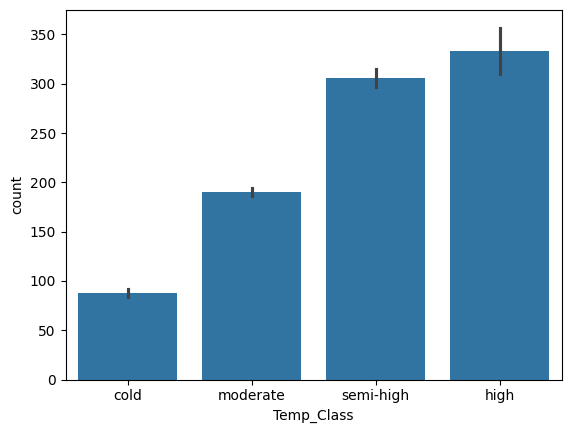

In [ ]:
sns.barplot(data = df_copy , x = "Temp_Class" , y = "count")

In [ ]:
cold = df_copy[df_copy["Temp_Class"] == "cold"]["count"].sample(100)
moderate = df_copy[df_copy["Temp_Class"] == "moderate"]["count"].sample(100)
semi_high = df_copy[df_copy["Temp_Class"] == "semi-high"]["count"].sample(100)
high = df_copy[df_copy["Temp_Class"] == "high"]["count"].sample(100)

'''
 Null Hypothesis ---> Temperature does not impact electric cycles rented
 Alternate Hypothsis ---> Temperature impact electric cycles rented
'''

#We will use one way Anova to check our hypothesis.



In [ ]:
# Let us check for levene and shapiro first

'''
Ho --> Variance is similar
Ha --> Variance is not similar
'''

stat , pval = levene(cold , moderate , semi_high , high)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Variance is not similar")
else:
  print("Accept Null Hypothesis : Variance is similar")

p_value : 1.475018079999246e-07
Reject Null Hypothesis : Variance is not similar


In [ ]:
'''
Ho --> Data is normally distributed
Ha --> Data is not normally distributed
'''

stat , pval1 = shapiro(cold)
stat , pval2 = shapiro(moderate)
stat , pval3 = shapiro(semi_high)
stat , pval4 = shapiro(high)

if pval1 < 0.05 or pval2 < 0.05 or pval3 < 0.05 or pval4 < 0.05:
  print("Reject Null Hypothesis : Data is not normally distributed")
else:
  print("Accept Null Hypothesis : Data is normally distributed")

Reject Null Hypothesis : Data is not normally distributed


In [ ]:
#both our test failed, but still let us continue with Anova testing

f_stat , pval = f_oneway(cold , moderate , semi_high , high)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Temprature impacts electric cycles rented")
else:
  print("Accept Null Hypothesis : Temprature has no impact")

p_value : 7.081935312729801e-22
Reject Null Hypothesis : Temprature impacts electric cycles rented


In [ ]:
from scipy.stats import kruskal

kruskal_stat , pval = kruskal(cold , moderate , semi_high , high)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Temprature impacts electric cycles rented")
else:
  print("Accept Null Hypothesis : Temprature has no impact")

p_value : 2.6739942303039425e-26
Reject Null Hypothesis : Temprature impacts electric cycles rented


Based on hypothesis testing, it is evident that Temprature impacts electric cycles rented.

Recommendations:

*   Implement dynamic pricing based on Temperature. For instance, offering discounts on cold temperature.

*   Use the app to provide real-time weather updates and recommendations for cyclists, including reminders to carry rain gear or hydration for hot days.



> Tesing if Weather is dependent on season



In [ ]:
wt_ss = pd.crosstab(df["season"] , df["weather"])

In [ ]:
wt_ss

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
# As we are tring to find the dependency of two Categorical Variable, we will use Chi-square test of Independency

'''
Ho --> Weather is independent of season
Ha --> Weather is dependent on season
'''

from scipy.stats import chi2_contingency

chi_stat , pval , dof , exp = chi2_contingency(wt_ss)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Weather is dependent on season")
else:
  print("Accept Null Hypothesis : Weather is independent of season")


p_value : 1.549925073686492e-07
Reject Null Hypothesis : Weather is dependent on season


Time Based Analysis

<Axes: xlabel='timePeriod', ylabel='count'>

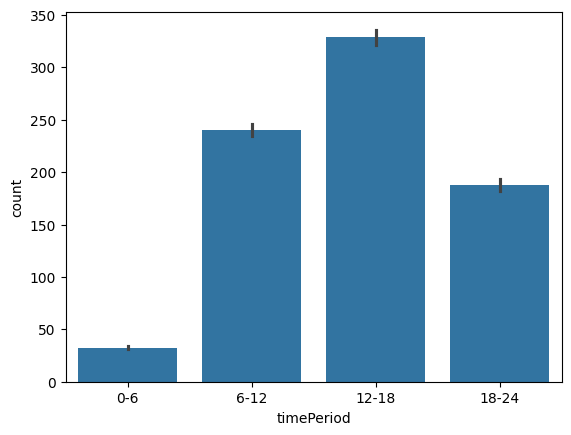

In [ ]:
df_copy = df.copy()

df_copy["sec"] = df_copy["datetime"].dt.hour*3600 + df_copy["datetime"].dt.minute*60

bins = [0*3600 , 6*3600 , 12*3600 , 18*3600 , 24*3600]
labels = ["0-6" , "6-12" , "12-18" , "18-24"]

df_copy["timePeriod"] = pd.cut(df_copy["sec"] , bins = bins , labels = labels , include_lowest = True)

sns.barplot(data = df_copy , x = "timePeriod" , y = "count")

Insights:-

*   Most bike is opted in time period between 12 PM to 6 PM. followed by 6 A.M to 12 PM.
*   Least bike is rented during the morning hours between 12AM to 6 AM.

Recommendations:-

*   Half price for the morning bike rider can be provided.

*   Yulu can come on with head on light for cycles for a better night riding experience.

*   Yulu can also impliment extra charges for renting bike during the peak time.








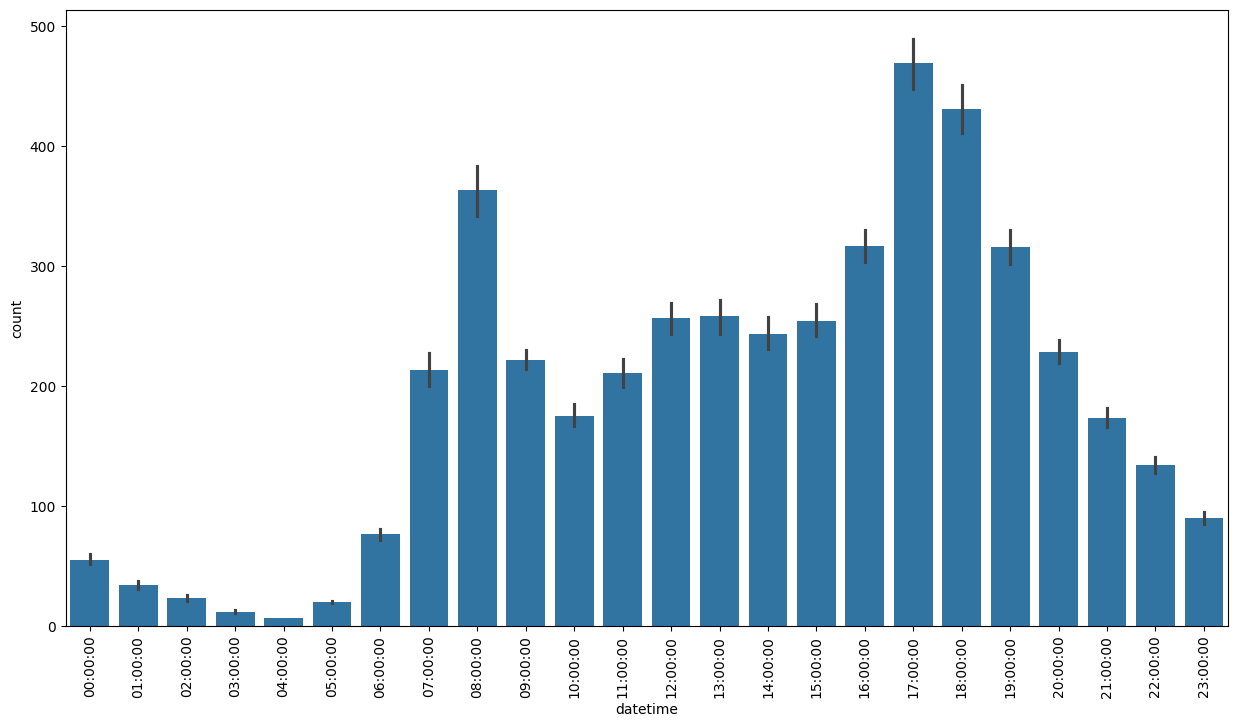

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data = df_copy , x = df_copy["datetime"].dt.time ,y = "count")
plt.xticks(rotation = 90)
plt.show()



> Analyse if Time is a factor on which riding of bike is dependent



In [ ]:
t1 = df_copy[df_copy["timePeriod"] == "0-6"]["count"].sample(500)
t2 = df_copy[df_copy["timePeriod"] == "6-12"]["count"].sample(500)
t3 = df_copy[df_copy["timePeriod"] == "12-18"]["count"].sample(500)
t4 = df_copy[df_copy["timePeriod"] == "18-24"]["count"].sample(500)

In [ ]:
levene(t1 , t2 , t3 , t4)

LeveneResult(statistic=169.15784532823213, pvalue=1.0489821816548413e-97)

Test failed for levene test, but still moving ahead with one-way ANOVA

In [ ]:
from scipy.stats import f_oneway

'''
Ho --> Time is not a factor on which riding of bike is dependent
Ha --> Time is a factor on which riding of bike is dependent
'''

f_stats , pval = f_oneway(t1 , t2 , t3 ,t4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Time is a factor on which riding of bike is dependent")
else:
  print("Accept Null Hypothesis : Time is not a factor on which riding of bike is dependent")

p_value : 1.5115936670908502e-186
Reject Null Hypothesis : Time is a factor on which riding of bike is dependent


In [ ]:
#let us check from kruskal-Wallis test,if it gives the same result.

'''
Ho --> Time is not a factor on which riding of bike is dependent
Ha --> Time is a factor on which riding of bike is dependent
'''

from scipy.stats import kruskal

k_stats , pval = kruskal(t1 , t2 , t3 , t4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Time is a factor on which riding of bike is dependent")
else:
  print("Accept Null Hypothesis : Time is not a factor on which riding of bike is dependent")

p_value : 2.4927897146589468e-219
Reject Null Hypothesis : Time is a factor on which riding of bike is dependent


Hypothesis testing indicates that the time of day significantly influences bike riding behavior

Recommendations:-



*    Ensure that bike availability is aligned with peak rental times (12 PM to 6 PM) to meet higher demand.

*   Consider offering promotions or discounts to encourage rentals during the less busy periods, such as early morning hours.

*   Increase the number of rental stations or make bikes more accessible during peak times to accommodate higher demand.

*   Schedule maintenance and servicing during off-peak hours to minimize impact on availability during busy times.
.


Wind Speed Analysis

In [ ]:
df["windspeed"].max() , df["windspeed"].min()

(56.9969, 0.0)

<Axes: xlabel='windspeed', ylabel='count'>

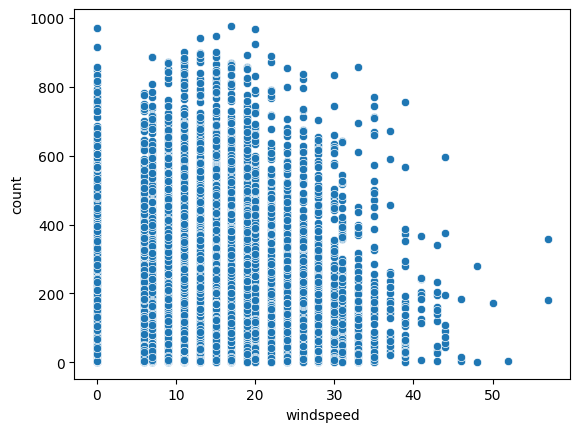

In [ ]:
sns.scatterplot(data = df , x = "windspeed" , y = "count")

Insights:-



*   Demand is seriously decreasing after wind speed exceeds 40 KMPH mark




<Axes: xlabel='wind_class', ylabel='count'>

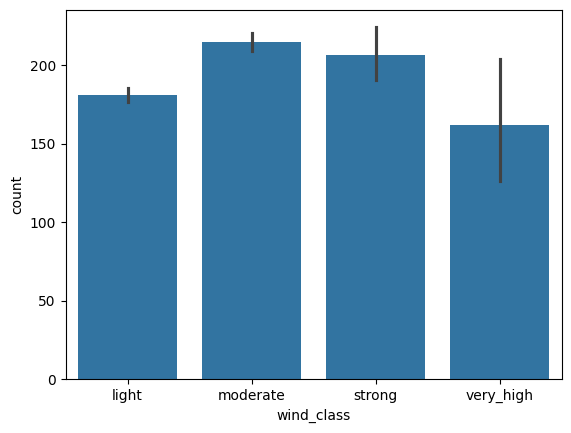

In [ ]:
bins = [0 , 15 , 28 , 40 , 57]
labels = ["light" , "moderate" , "strong" , "very_high"]

#the classification is on reference made by India Meteorological Department (IMD)

df_copy["wind_class"] = pd.cut(df_copy["windspeed"] , bins = bins , labels = labels)

sns.barplot(data = df_copy , x = "wind_class" , y = "count")

Let us test if Wind-Speed affects customers to opt for bike riding


In [ ]:
w1 = df_copy[df_copy["wind_class"] == "light"]["count"].sample(500)
w2 = df_copy[df_copy["wind_class"] == "moderate"]["count"].sample(500)
w3 = df_copy[df_copy["wind_class"] == "strong"]["count"]
w4 = df_copy[df_copy["wind_class"] == "very_high"]["count"]

In [ ]:
# Let us try implimenting One-Way ANOVA

#levene Test

'''
Ho --> Variance is similar
Ha --> Variance is not similar
'''

stat , pval = levene(w1 , w2 , w3 , w4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Variance is not similar")
else:
  print("Accept Null Hypothesis : Variance is similar")

p_value : 0.02032958574514809
Reject Null Hypothesis : Variance is not similar


In [ ]:
#Shapiro Test

'''
Ho --> Data is normally distributed
Ha --> Data is not normally distributed
'''

stat , pval1 = shapiro(w1)
stat , pval2 = shapiro(w2)
stat , pval3 = shapiro(w3)
stat , pval4 = shapiro(w4)

if (pval1 < 0.05) or (pval2 < 0.05) or (pval3 < 0.05) or (pval4 < 0.05):
  print("Reject Null Hypothesis : Data is not normally distributed")
else:
  print("Accept Null Hypothesis : Data is normally distributed")

Reject Null Hypothesis : Data is not normally distributed


Data failed for Levene and Shapiro Test, but still moving on with ANOVA test for analysis

In [ ]:
'''
Ho --> Wind-Speed is not a factor on which riding of bike is dependent
Ha --> Wind_speed is a factor on which riding of bike is dependent
'''

from scipy.stats import f_oneway

stat , pval = f_oneway(w1 , w2 , w3 , w4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Wind-Speed is a factor on which riding of bike is dependent")
else:
  print("Accept Null Hypothesis : Wind-Speed is not a factor on which riding of bike is dependent")

p_value : 0.0008176339019266394
Reject Null Hypothesis : Wind-Speed is a factor on which riding of bike is dependent


In [ ]:
# let us now use Kruskal Wallis test to check if it matches the above test result or not

stat , pval = kruskal(w1 , w2 , w3 , w4)

print(f"p_value : {pval}")

if pval < 0.05:
  print("Reject Null Hypothesis : Wind-Speed is a factor on which riding of bike is dependent")
else:
  print("Accept Null Hypothesis : Wind-Speed is not a factor on which riding of bike is dependent")

p_value : 0.00013288819499648126
Reject Null Hypothesis : Wind-Speed is a factor on which riding of bike is dependent


Hypothesis testing indicates that Wind-Speed is a factor on which riding of bike is dependent



Summary

Insights:-

*   registered users contribute more significantly to the total count of bike rentals than casual Users


*   No significant difference in the number of electric cycles rented on working days compared to non-working days.


*   The optimal conditions for booking a ride are when the temperature is between 20 to 30 degrees Celsius, humidity levels are between 45% and 75%, and wind speeds range from 8 to 18 km/h

*    Number of cycles rented is significantly influenced by the season.

*   The count of bike rides varies significantly across seasons. The highest number of rides occurs in fall (season 3), followed closely by summer (season 2). Spring (season 1) shows the lowest ridership.



*   Number of cycles rented is significantly influenced by weather conditions

*   The number of bike rides decreases significantly in harsher weather conditions (e.g., light snow, heavy rain, snow + fog). The highest ridership occurs on clear or slightly cloudy days (weather condition 1).


*   Temprature impacts electric cycles rented.


*   As the temperature increases, there is a noticeable rise in the number of people opting for Yulu cycles

*   Time impacts electric cycles rented.

*   Most bike is opted in time period between 12 PM to 6 PM. followed by 6 A.M to 12 PM. and Least bike is rented during the morning hours between 12AM to 6 AM.

*    Wind-Speed is a factor on which riding of bike is dependent


*   Cycling activity remains relatively stable when wind speeds are between 20 KMPH and 30 KMPH, but beyond this range, there is a significant drop and increased fluctuations in ridership.


Recommendations:-



*   Focus marketing efforts on converting casual users into registered users, as they significantly contribute to overall rentals.

*   Casual users are less likely to rent on working days. Therefore, consider offering special promotions or events on weekends to attract more casual riders

*   Implement dynamic pricing based on weather conditions. For instance, offering discounts on days with less favorable weather (e.g., rain) to encourage ridership even when the weather is less favorable. Yulu can also provide raincoats for users to keep riding cycle as an option in bad weather condition.



*   Since bike ridership peaks in fall and summer, consider launching promotional campaigns, discounts, or memberships during these seasons to capitalize on the higher demand.
*   List item


*   Yulu can give some discounts in off-season like in spring season, to encorage ridership troughout the year.



*   Introduce loyalty programs or benefits for registered users, such as discounts on long-term rents or more favorable to get access to bikes during peak hours. This could further encourage regular usage among registered users.

*   Launch targeted campaigns aimed at converting casual users into registered users. Yulu can create a messaging service within the register users where they can register thier complain or even talk to each other.

*   Half price for the morning bike rider can be provided.

*   Yulu can come on with head on light for cycles for a better night riding experience.


*   Yulu can also impliment extra charges for renting bike during the peak time.















